In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
import tensorflow as tf
from tensorflow import keras
import numpy as numpy
import cv2
import random
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/archive.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/CRACK DATASET")

0 For positive and 1 For negative

In [117]:
DATA=[]
for i,label in enumerate(['/content/drive/MyDrive/CRACK DATASET/Positive','/content/drive/MyDrive/CRACK DATASET/Negative']):
    for image in os.listdir(label)[:8000]:
            path=label+'/'+image
            image=cv2.imread(path)
            image=cv2.resize(image,(32,32))
            DATA.append((image,i))
DATA=np.array(DATA)
random.shuffle(DATA)

In [118]:
DATA[:,1]

array([0, 0, 0, ..., 1, 0, 1], dtype=object)

In [119]:
Images=DATA[:,0]
Labels=DATA[:,1]
IMAGES=np.array([image for image in Images])
IMAGES.shape

(16000, 32, 32, 3)

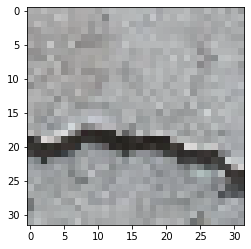

In [120]:
plt.imshow(IMAGES[0])

In [121]:
x_train,x_test,y_train,y_test=train_test_split(IMAGES,Labels,test_size=0.2)

In [122]:
pd.Series(y_train).value_counts()

0    10842
1     1958
dtype: int64

In [123]:
pd.Series(y_test).value_counts()

0    2733
1     467
dtype: int64

In [124]:
Rescaled_x_train=x_train/255.0
Rescaled__x_test=x_test/255.0

In [125]:
type(Rescaled_x_train)

numpy.ndarray

In [126]:
X = np.asarray(Rescaled_x_train).astype(np.float32)
x_test= np.asarray(Rescaled__x_test).astype(np.float32)
Y=np.asarray(y_train).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

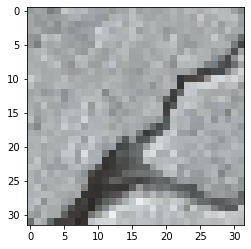

In [128]:
plt.imshow(Rescaled_x_train[0])

Mobile Net V2

In [ ]:
MobileNetV2_model = tf.keras.applications.MobileNetV2(input_shape=(32,32,3),
                                               include_top=False,
                                               weights='imagenet')
MobileNetV2_model.trainable = False
Hidden_1=keras.layers.Dense(50,activation='relu')(keras.layers.Flatten()(MobileNetV2_model.output))
output=keras.layers.Dense(1,activation='sigmoid')(Hidden_1)
Model=keras.models.Model([MobileNetV2_model.input],[output])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
Model.summary()

In [ ]:
Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['Accuracy'])

In [ ]:
Model.fit(X,Y,epochs=10)

Epoch 1/10
400/400 [==============================] - 18s 27ms/step - loss: 0.2417 - Accuracy: 0.8969
Epoch 2/10
400/400 [==============================] - 11s 27ms/step - loss: 0.1247 - Accuracy: 0.9470
Epoch 3/10
400/400 [==============================] - 11s 27ms/step - loss: 0.1052 - Accuracy: 0.9587
Epoch 4/10
400/400 [==============================] - 11s 26ms/step - loss: 0.1147 - Accuracy: 0.9513
Epoch 5/10
400/400 [==============================] - 10s 26ms/step - loss: 0.0831 - Accuracy: 0.9660
Epoch 6/10
400/400 [==============================] - 11s 26ms/step - loss: 0.0917 - Accuracy: 0.9623
Epoch 7/10
400/400 [==============================] - 11s 26ms/step - loss: 0.0940 - Accuracy: 0.9609
Epoch 8/10
400/400 [==============================] - 11s 28ms/step - loss: 0.0771 - Accuracy: 0.9694
Epoch 9/10
400/400 [==============================] - 11s 27ms/step - loss: 0.0822 - Accuracy: 0.9665
Epoch 10/10
400/400 [==============================] - 11s 27ms/step - loss: 0.078

In [ ]:
len(Model.trainable_variables)

4

In [ ]:
ResNet152_model = tf.keras.applications.ResNet152(weights = 'imagenet', 
                                                  include_top = False, input_shape = (32,32,3))
ResNet152_model.trainable=False
x = keras.layers.Flatten()(ResNet152_model.output)
x = keras.layers.Dense(100, activation='relu')(x)
output = keras.layers.Dense(1, activation = 'sigmoid')(x)
Model=keras.models.Model([ResNet152_model.input],[output])

In [ ]:
Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',metrics=['Accuracy'])

In [ ]:
hist=Model.fit(X,Y,epochs=10)

Epoch 1/10
400/400 [==============================] - 51s 79ms/step - loss: 0.2244 - Accuracy: 0.9040
Epoch 2/10
400/400 [==============================] - 28s 70ms/step - loss: 0.1014 - Accuracy: 0.9624
Epoch 3/10
400/400 [==============================] - 27s 68ms/step - loss: 0.1078 - Accuracy: 0.9559
Epoch 4/10
400/400 [==============================] - 29s 72ms/step - loss: 0.0878 - Accuracy: 0.9666
Epoch 5/10
400/400 [==============================] - 29s 73ms/step - loss: 0.0940 - Accuracy: 0.9631
Epoch 6/10
400/400 [==============================] - 29s 73ms/step - loss: 0.1003 - Accuracy: 0.9588
Epoch 7/10
400/400 [==============================] - 27s 68ms/step - loss: 0.0782 - Accuracy: 0.9691
Epoch 8/10
400/400 [==============================] - 28s 70ms/step - loss: 0.0803 - Accuracy: 0.9695
Epoch 9/10
400/400 [==============================] - 28s 69ms/step - loss: 0.0827 - Accuracy: 0.9687
Epoch 10/10
400/400 [==============================] - 28s 69ms/step - loss: 0.076

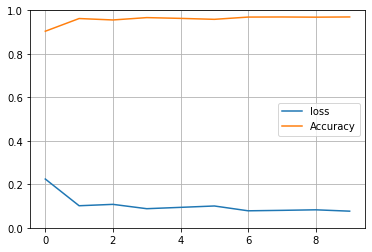

In [ ]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
len(Model.trainable_variables)

4

#Double Step Learning

In [11]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/SDNET2018.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/CRACK DATASET/crack_dataset_2")

In [140]:
def GET_Double_step_data(path_1,path_2):
  DATA_2=[]
  for i,label in enumerate([path_1,path_2]):
    for image in os.listdir(label)[:2000]:
      path=label+'/'+image
      image=cv2.imread(path)
      image=cv2.resize(image,(32,32))
      DATA_2.append((image,i))
  return np.array(DATA_2)

In [141]:
from sklearn.utils import shuffle
D_data=GET_Double_step_data('/content/drive/MyDrive/CRACK DATASET/crack_dataset_2/D/CD','/content/drive/MyDrive/CRACK DATASET/crack_dataset_2/D/UD')
D_data=shuffle(D_data)
P_data=GET_Double_step_data('/content/drive/MyDrive/CRACK DATASET/crack_dataset_2/P/CP','/content/drive/MyDrive/CRACK DATASET/crack_dataset_2/P/UP')
P_data=shuffle(P_data)
W_data=GET_Double_step_data('/content/drive/MyDrive/CRACK DATASET/crack_dataset_2/W/CW','/content/drive/MyDrive/CRACK DATASET/crack_dataset_2/W/UW')
W_data=shuffle(W_data)


In [142]:
D_data_images=D_data[:,0]
D_data_labels=D_data[:,1]
P_data_images=P_data[:,0]
P_data_labels=P_data[:,1]
W_data_images=W_data[:,0]
W_data_labels=W_data[:,1]
D_data_images=np.array([image for image in D_data_images])
P_data_images=np.array([image for image in P_data_images])
W_data_images=np.array([image for image in W_data_images])
D_data_images.shape,P_data_images.shape,W_data_images.shape

((4000, 32, 32, 3), (4000, 32, 32, 3), (4000, 32, 32, 3))

In [143]:
d=pd.DataFrame({'images':list(D_data_images)})
p=pd.DataFrame({'images':list(P_data_images)})
w=pd.DataFrame({'images':list(W_data_images)})
d_label=pd.DataFrame({'LABELS':list(D_data_labels)})
p_label=pd.DataFrame({'LABELS':list(P_data_labels)})
w_label=pd.DataFrame({'LABELS':list(W_data_labels)})

In [144]:
ALL_IMAGES=pd.concat([d,p,w])
ALL_LABELS=pd.concat([d_label,p_label,w_label])

In [145]:
ALL_IMAGES=np.array([ i for i in ALL_IMAGES['images'].values])

In [146]:
ALL_LABELS=np.array(ALL_LABELS)
ALL_LABELS.shape

(12000, 1)

In [147]:
ALL_LABELS

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

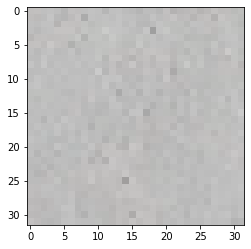

In [148]:
plt.imshow(ALL_IMAGES[35])

In [149]:
ALL_LABELS[35]

array([0])

In [150]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(ALL_IMAGES,ALL_LABELS,test_size=0.2)

In [151]:
scaled_x_train_2=x_train_2/255.0
scaled_x_test_2=x_test_2/255.0

In [152]:
y_train_2=np.asarray(y_train_2).astype(np.float32)
y_test_2=np.asarray(y_test_2).astype(np.float32)

In [153]:
y_train_2.shape,y_test_2.shape

((9600, 1), (2400, 1))

First step (in Double step transfer learning)

In [168]:
resnet50_model=keras.applications.resnet.ResNet50(include_top=False, 
                                                  weights='imagenet',
                                                  input_shape=(32,32,3))

In [169]:
for layer in resnet50_model.layers:
  layer.trainable=False

In [170]:
flat=keras.layers.Flatten()(resnet50_model.output)
Hidden_1=keras.layers.Dense(100,activation='relu')(flat)
output=keras.layers.Dense(1,activation='sigmoid')(Hidden_1)
ResNet_50_Model=keras.models.Model([resnet50_model.input],[output])

In [171]:
ResNet_50_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['Accuracy'])
hist=ResNet_50_Model.fit(scaled_x_train_2,y_train_2,epochs=10)

Epoch 1/10
300/300 [==============================] - 11s 26ms/step - loss: 0.7113 - Accuracy: 0.5065
Epoch 2/10
300/300 [==============================] - 8s 25ms/step - loss: 0.6989 - Accuracy: 0.5163
Epoch 3/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6912 - Accuracy: 0.5308
Epoch 4/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6912 - Accuracy: 0.5317
Epoch 5/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6870 - Accuracy: 0.5380
Epoch 6/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6843 - Accuracy: 0.5354
Epoch 7/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6825 - Accuracy: 0.5403
Epoch 8/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6774 - Accuracy: 0.5456
Epoch 9/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6835 - Accuracy: 0.5349
Epoch 10/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6815 - Accur

In [172]:
ResNet_50_Model.evaluate(x_test,y_test)

100/100 [==============================] - 4s 27ms/step - loss: 0.3577 - Accuracy: 0.8800


[0.3576713800430298, 0.8799999952316284]

Second Step (in Double step transfer learning)

In [174]:
for layer in ResNet_50_Model.layers:
  layer.trainable=False
Hidden_1_second=keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(ResNet_50_Model.get_layer('conv5_block3_out').output)
flat_second=keras.layers.Flatten()(Hidden_1_second)
hidden_2_second=keras.layers.Dense(200,activation='relu')(flat_second)
output_second=keras.layers.Dense(1,activation='sigmoid')(hidden_2_second)
Second_Step_Model=keras.models.Model([ResNet_50_Model.input],[output_second])

In [175]:
Second_Step_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['Accuracy'])
hist_2=Second_Step_Model.fit(X,Y,epochs=10)

Epoch 1/10
400/400 [==============================] - 16s 30ms/step - loss: 0.2611 - Accuracy: 0.8927
Epoch 2/10
400/400 [==============================] - 12s 30ms/step - loss: 0.1034 - Accuracy: 0.9585
Epoch 3/10
400/400 [==============================] - 12s 29ms/step - loss: 0.0852 - Accuracy: 0.9651
Epoch 4/10
400/400 [==============================] - 12s 29ms/step - loss: 0.0898 - Accuracy: 0.9641
Epoch 5/10
400/400 [==============================] - 12s 29ms/step - loss: 0.0811 - Accuracy: 0.9670
Epoch 6/10
400/400 [==============================] - 12s 30ms/step - loss: 0.0812 - Accuracy: 0.9695
Epoch 7/10
400/400 [==============================] - 12s 29ms/step - loss: 0.0804 - Accuracy: 0.9665
Epoch 8/10
400/400 [==============================] - 12s 29ms/step - loss: 0.0768 - Accuracy: 0.9695
Epoch 9/10
400/400 [==============================] - 12s 30ms/step - loss: 0.0711 - Accuracy: 0.9719
Epoch 10/10
400/400 [==============================] - 12s 29ms/step - loss: 0.074

In [176]:
Second_Step_Model.evaluate(x_test,y_test)

100/100 [==============================] - 4s 30ms/step - loss: 0.0626 - Accuracy: 0.9762


[0.06255251169204712, 0.9762499928474426]

CROSS TALK MACHINES Second way

In [177]:
class Cross_Talk_Machines():
  def __init__(self):
    self.resnet50_model=keras.applications.resnet.ResNet50(include_top=False, 
                  weights='imagenet',input_shape=(32,32,3))
  def Single_Step_Transfer_Learning(self,x_train,y_train):
    for layer in self.resnet50_model.layers:
      layer.trainable=False
    flat=keras.layers.Flatten()(self.resnet50_model.output)
    Hidden_1=keras.layers.Dense(100,activation='relu')(flat)
    output=keras.layers.Dense(1,activation='sigmoid')(Hidden_1)
    ResNet_50_Model=keras.models.Model([self.resnet50_model.input],[output])
    ResNet_50_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['Accuracy'])
    return ResNet_50_Model.fit(x_train,y_train,epochs=10),ResNet_50_Model
  def Double_Step_Transfer_Learning(self,x_train,y_train,x_train_2,y_train_2):
    for layer in self.resnet50_model.layers:
      layer.trainable=False
    flat=keras.layers.Flatten()(self.resnet50_model.output)
    Hidden_1=keras.layers.Dense(100,activation='relu')(flat)
    output=keras.layers.Dense(1,activation='sigmoid')(Hidden_1)
    ResNet_50_Model=keras.models.Model([self.resnet50_model.input],[output])
    ResNet_50_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['Accuracy'])
    ResNet_50_Model.fit(x_train,y_train,epochs=10)
    print('...... Double step Transfer Learning')
    for layer in ResNet_50_Model.layers:
      layer.trainable=False
    flat_second=keras.layers.Flatten()(ResNet_50_Model.get_layer('conv5_block3_out').output)
    Hidden_1_second=keras.layers.Dense(500,activation='relu')(flat_second)
    output_second=keras.layers.Dense(1,activation='sigmoid')(Hidden_1_second)
    Second_Step_Model=keras.models.Model([ResNet_50_Model.input],[output_second])

    Second_Step_Model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['Accuracy'])
    return Second_Step_Model.fit(x_train_2,y_train_2,epochs=10),Second_Step_Model


In [178]:
CTM=Cross_Talk_Machines()

In [179]:
transfer_learning_model=CTM.Single_Step_Transfer_Learning(scaled_x_train_2,y_train_2)

Epoch 1/10
300/300 [==============================] - 14s 35ms/step - loss: 0.7412 - Accuracy: 0.5100
Epoch 2/10
300/300 [==============================] - 9s 31ms/step - loss: 0.7177 - Accuracy: 0.5239
Epoch 3/10
300/300 [==============================] - 8s 25ms/step - loss: 0.6962 - Accuracy: 0.5296
Epoch 4/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6805 - Accuracy: 0.5458
Epoch 5/10
300/300 [==============================] - 8s 25ms/step - loss: 0.6978 - Accuracy: 0.5416
Epoch 6/10
300/300 [==============================] - 8s 25ms/step - loss: 0.6926 - Accuracy: 0.5322
Epoch 7/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6871 - Accuracy: 0.5410
Epoch 8/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6790 - Accuracy: 0.5444
Epoch 9/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6795 - Accuracy: 0.5395
Epoch 10/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6768 - Accur

In [180]:
CTM=Cross_Talk_Machines()
Double_Step_transfer_learning_model=CTM.Double_Step_Transfer_Learning(scaled_x_train_2,y_train_2,X,Y)

Epoch 1/10
300/300 [==============================] - 12s 28ms/step - loss: 0.7335 - Accuracy: 0.5124
Epoch 2/10
300/300 [==============================] - 8s 26ms/step - loss: 0.7076 - Accuracy: 0.5249
Epoch 3/10
300/300 [==============================] - 8s 26ms/step - loss: 0.7022 - Accuracy: 0.5295
Epoch 4/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6972 - Accuracy: 0.5342
Epoch 5/10
300/300 [==============================] - 8s 28ms/step - loss: 0.6856 - Accuracy: 0.5476
Epoch 6/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6829 - Accuracy: 0.5434
Epoch 7/10
300/300 [==============================] - 8s 27ms/step - loss: 0.6774 - Accuracy: 0.5471
Epoch 8/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6864 - Accuracy: 0.5378
Epoch 9/10
300/300 [==============================] - 8s 26ms/step - loss: 0.6812 - Accuracy: 0.5447
Epoch 10/10
300/300 [==============================] - 8s 28ms/step - loss: 0.6741 - Accur

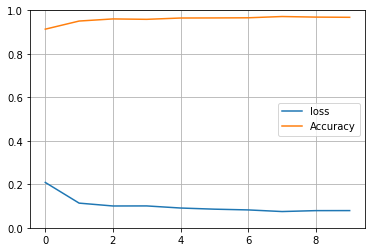

In [182]:
pd.DataFrame(Double_Step_transfer_learning_model[0].history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [183]:
import numpy as np
Double_Step_transfer_learning_model[1].evaluate(x_test,y_test)

100/100 [==============================] - 4s 26ms/step - loss: 0.0656 - Accuracy: 0.9769


[0.06563739478588104, 0.9768750071525574]

END